In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
first_image_name = "van_goth"
second_image_name = "pikachu"


# Convert the image into a .npy
def convert_image_into_np(filename, format="jpg"):
    image = Image.open(f"images/{filename}.{format}")
    image = image.convert('RGB')
    image_array = np.array(image)
    np.save(f'images/{filename}.npy', image_array)
    print("Image converted and saved as image.npy in " + f"images/{filename}.jpg")


convert_image_into_np(first_image_name, "webp")
convert_image_into_np(second_image_name)


Image converted and saved as image.npy in images/van_goth.jpg
Image converted and saved as image.npy in images/pikachu.jpg


In [5]:
def resize_image_nearest_neighbor(image, new_size):
    """
    Resize an image using nearest neighbor interpolation with NumPy.
    
    Parameters:
    image (numpy.ndarray): Input image array.
    new_size (tuple): Desired size (new_width, new_height) for the resized image.
    
    Returns:
    numpy.ndarray: Resized image.
    """
    old_height, old_width = image.shape[:2]  # Get the dimensions of the original image
    new_height, new_width = new_size         # Unpack the new size

    # Calculate scaling factors
    row_scale = old_height / new_height
    col_scale = old_width / new_width

    # Create a grid of indices for the new image
    row_indices = (np.arange(new_height) * row_scale).astype(int)
    col_indices = (np.arange(new_width) * col_scale).astype(int)

    # Use advanced indexing to map the original image pixels to the new image
    resized_image = image[row_indices[:, np.newaxis], col_indices]

    return resized_image

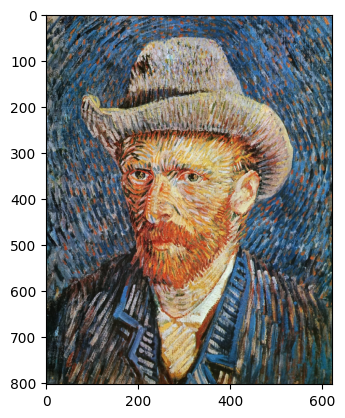

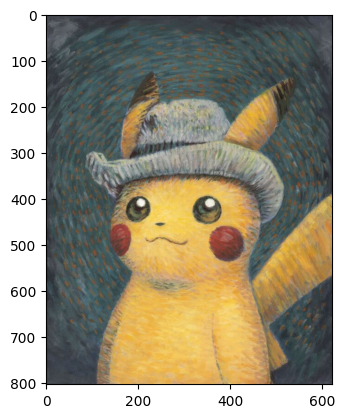

In [6]:
# Load the .npy image
def load_rgb_image_as_np(path):
    with open(path, "rb") as f:
        return np.load(f)

def show_image(rgb_array):
    plt.imshow(rgb_array, cmap='gray')
    plt.show()


first_image_rgb = load_rgb_image_as_np(f"images/{first_image_name}.npy")
second_image_rgb = load_rgb_image_as_np(f"images/{second_image_name}.npy")
first_image_rgb = resize_image_nearest_neighbor(first_image_rgb,second_image_rgb.shape[:2])
show_image(first_image_rgb)
show_image(second_image_rgb)

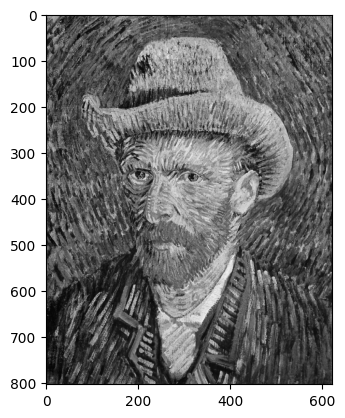

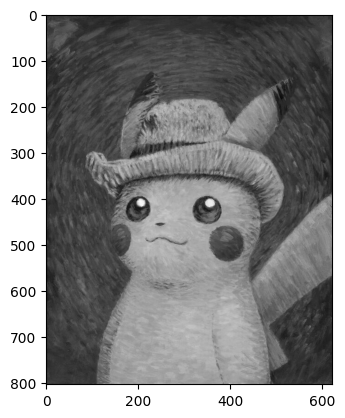

In [7]:
def make_grey_scale(rgb_array): 
    return np.mean(rgb_array, axis=2)

first_image_grey_scale = make_grey_scale(first_image_rgb)
second_image_grey_scale = make_grey_scale(second_image_rgb)
show_image(first_image_grey_scale)
show_image(second_image_grey_scale)


In [8]:


def compress_image_k_clustering(data_points, center_points = None, k = None):
    center_points = np.random.randint(1, 255, size=(k))
    # for broadcast compatibility we reshape center points and data points
    center_points_reshaped = center_points[:, np.newaxis, np.newaxis]
    data_points_reshaped = data_points[np.newaxis, :,  :]
    # it's an np array that will be like this (n, k)
    euclidian_distance = np.abs(center_points_reshaped - data_points_reshaped)
    # from euclidian distance we take the indice of the column with the minimum value for each row
    min_indices = np.argmin(euclidian_distance, axis=0)
    compressed_image= center_points[min_indices]
    show_image(compressed_image)
    return center_points, compressed_image

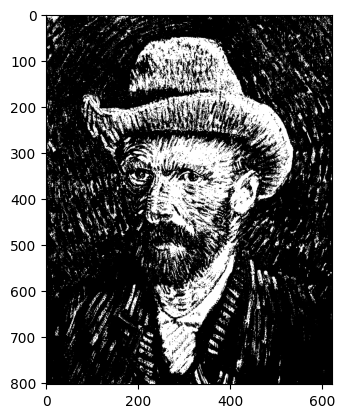

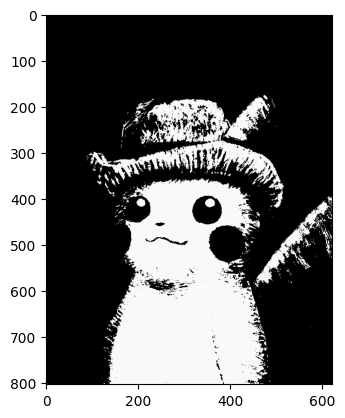

In [9]:
colors_first_image, first_image_grey_scale = compress_image_k_clustering(first_image_grey_scale, None, k=3)
colors_second_image, second_image_grey_scale = compress_image_k_clustering(second_image_grey_scale, None, k=3)

In [34]:



def morph_images(image1, image2, step):
    previous_iteration_image1 = image1
    while(not np.array_equal(image1,image2)):
        image1 = np.where(image1 > image2, image1 - step,  np.where(image1 < image2,  image1 + step, image1))
        show_image(image1)
        diff = np.all(np.abs(image1 - previous_iteration_image1))
        if diff < 1000:  # Set a threshold to stop the iterations
            break
        previous_iteration_image1 = image1


In [35]:
morph_images(first_image_rgb, second_image_rgb, step=10)

OverflowError: Python integer 1000 out of bounds for uint8